In [2]:
from sqlalchemy import create_engine
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

carregando os datasets.

In [3]:
orders = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_orders_dataset.csv'
)
order_items = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_order_items_dataset.csv'
)
customers = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_customers_dataset.csv'
)
products = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_products_dataset.csv'
)
sellers = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_sellers_dataset.csv'
)
payments = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_order_payments_dataset.csv'
)
geolocation = pd.read_csv(
    'C:/Users/ricka/Desktop/Area de Trabalho/Projeto de Estudo Machine '
    'Learning/Projetos e Estudos Git - Machine Learning/Portifolio/'
    'Olist_Ecommerce_Analysis/data/datasets originais/olist_geolocation_dataset.csv'
)

Verificando o números de linhas e colunas de cada dataset.

In [4]:
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Customers:", customers.shape)
print("Products:", products.shape)
print("Sellers:", sellers.shape)
print("Payments:", payments.shape)
print("Geolocation:", geolocation.shape)

Orders: (99441, 8)
Order Items: (112650, 7)
Customers: (99441, 5)
Products: (32951, 9)
Sellers: (3095, 4)
Payments: (103886, 5)
Geolocation: (1000163, 5)


In [5]:
# ANALISANDO O DATASET "ORDERS"
pd.set_option("display.max_columns", None)
print(orders.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [6]:
# Verificando se existem valores nulos.
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [7]:
""" Existem dados numéricos nulos na coluna de data de aprovação da ordem,
indicando que as ordens não foram aprovadas. A coluna de data de envio também
possui dados nulos, indicando que o pedido não foi enviado. E, por fim, na coluna
data de entrega, indicando que o pedido não foi entregue. Contudo, os dados serão
mantidos como estão, pois o tipo da coluna será alterado para datetime e os valores
nulos serão NaT (Not a time). Isso mantém a coerência dos dados e evita problemas
com operações envolvendo datas."""

' Existem dados numéricos nulos na coluna de data de aprovação da ordem,\nindicando que as ordens não foram aprovadas. A coluna de data de envio também\npossui dados nulos, indicando que o pedido não foi enviado. E, por fim, na coluna\ndata de entrega, indicando que o pedido não foi entregue. Contudo, os dados serão\nmantidos como estão, pois o tipo da coluna será alterado para datetime e os valores\nnulos serão NaT (Not a time). Isso mantém a coerência dos dados e evita problemas\ncom operações envolvendo datas.'

In [8]:
# Verificando o tipo dos dados.
print(orders.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [9]:
# Convertendo conlunas de data para datetime
date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

In [10]:
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors="coerce")

In [11]:
# Convertendo colunas IDs para string.
orders["order_id"] = orders["order_id"].astype(str)
orders["customer_id"] = orders["customer_id"].astype(str)

In [12]:
# Convertendo a coluna "order status" para o tipo categoria.
orders["order_status"] = orders["order_status"].astype("category")

In [13]:
# Verificando se os tipos das variáveis corrigido.
print(orders.dtypes)

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


ANALISANDO O DATASET "ORDERS_ITEMS."

In [14]:
pd.set_option("display.max_columns", None)
print(order_items.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [15]:
# Verificando a existência de dados nulos.
print(order_items.isnull().sum())
""" Não existem dados nulos."""

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


' Não existem dados nulos.'

In [16]:
# Verificando o tipo dos dados.
print(order_items.dtypes)
""" O tipo de dado encontrado que não condiz com o tipo de dado correto
da coluna, é o Shipping_limit_date, portanto essa coluna será convertida
do tipo objeto para datetime."""

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


' O tipo de dado encontrado que não condiz com o tipo de dado correto\nda coluna, é o Shipping_limit_date, portanto essa coluna será convertida\ndo tipo objeto para datetime.'

In [17]:
# Convertendo a coluna shipping_limit_date para datetime.
order_items["shipping_limit_date"] = pd.to_datetime(
    order_items["shipping_limit_date"], errors="coerce")

In [18]:
# Verificando se o tipo de dado foi alterado.
print(order_items.dtypes)

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


ANALISANDO O DATASET "CUSTOMERS".

In [ ]:
pd.set_option("display.max_columns", None)
print(customers.head())

In [ ]:
# Verificando a existência de dados nulos.
print(customers.isnull().sum())
""" Não existem dados nulos."""

In [ ]:
# Verificando o tipo de dados de cada coluna.
print(customers.dtypes)
""" Os tipos de dados estão corretos."""

ANALISANDO O DATASET "PRODUCTS".

In [ ]:
pd.set_option("display.max_columns", None)
print(products.head())

In [ ]:
# Verificando a existência de dados nulos.
print(products.isnull().sum())
""" Foram encontrados dados nulos no nome da categoria do produto,
o que será preenchido por "Desconhecido". Dados nulos também foram
encontrados nas colunas: comprimento do nome do produto, comprimento
da descrição e quantidade de fotos, os dados serão preenchidos com a
mediana para evitar distorções causadas por valores extremos. Por fim,
fora encontrados dois dados nulos na colunas: peso, comprimento, altura
e largura, todos os dados também serão preenchidos com a mediana.
"""
# Verificando o tipo de dados de cada coluna.
print(products.dtypes)
""" Os tipos de dados estão corretos."""

In [ ]:
# Tratando os dados nulos.
products["product_category_name"].fillna("Desconhecido", inplace=True)
num_cols = [
    "product_name_lenght", "product_description_lenght",
    "product_photos_qty", "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]
for col in num_cols:
    products[col].fillna(products[col].median(), inplace=True)

In [ ]:
# Verificando se os dados nulos foram tratados.
print(products.isnull().sum())
""" Os dados foram tratados."""

ANALISANDO O DATASET "SELLERS".

In [ ]:
pd.set_option("display.max_columns", None)
print(sellers.head())

In [ ]:
# Verificando a existência de dados nulos.
print(sellers.isnull().sum())
"""O dataset não possui dados nulos."""

In [ ]:
# Verificando o tipo de dados de cada coluna.
print(sellers.dtypes)
""" Os tipos de dados estão corretos."""

ANALISANDO O DATASET "PAYMENTS".

In [ ]:
pd.set_option("display.max_columns", None)
print(payments.head())

In [ ]:
# Analisando a presença de dados nulos.
print(payments.isnull().sum())
""" O dataset não possui dados nulos. """

In [ ]:
# Analisando os tipos de dados de cada coluna.
print(payments.dtypes)

In [ ]:
# Alterando o tipo de dados da coluna payment_type para categoria.
print(payments["payment_type"].unique())
payments["payment_type"] = payments["payment_type"].astype("category")

In [ ]:
# Verificando se o tipo da coluna foi alterado.
print(payments["payment_type"].dtypes)
""" O tipo de dado foi alterado. """

ANALISANDO O DATASET "GEOLOCATION".

In [ ]:
pd.set_option("display.max_columns", None)
print(geolocation.head())

In [ ]:
# Verificando a existencia de dados nulos.
print(geolocation.isnull().sum())
""" O dataset não possui dados nulos. """

In [ ]:
# Verificando se os tipos de dados estão corretos.
print(geolocation.dtypes)
""" Os tipos de dados estão corretos. """

ANALISE EXPLORATÓRIA DOS DADOS COM VISUALIZAÇÕES.

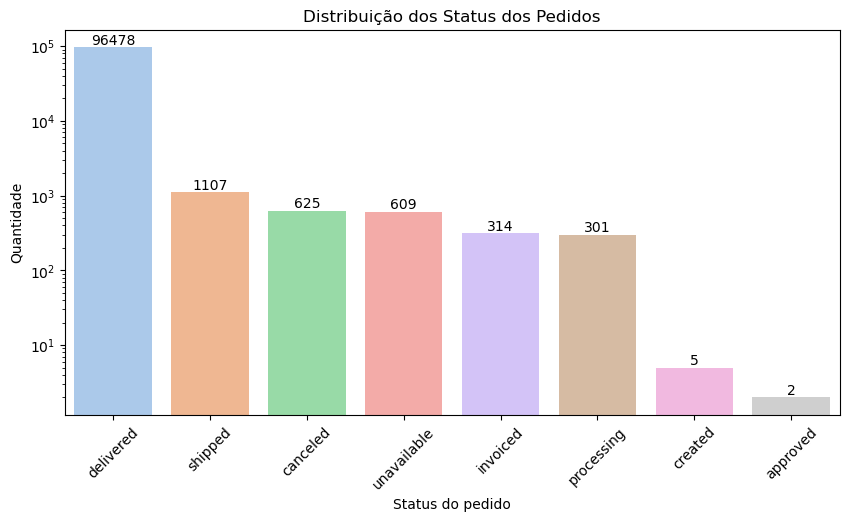

' A grande maioria dos pedidos foram entregues, indicando que o sistema de\nentrega dos pedidos está funcionando bem. '

In [19]:
# Contagem de pedidos por status.
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=orders, x="order_status", order=orders[
    "order_status"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Distribuição dos Status dos Pedidos")
plt.xlabel("Status do pedido")
plt.ylabel("Quantidade")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )
plt.show()
""" A grande maioria dos pedidos foram entregues, indicando que o sistema de
entrega dos pedidos está funcionando bem. """

Análise dos pedidos ao longo do tempo.

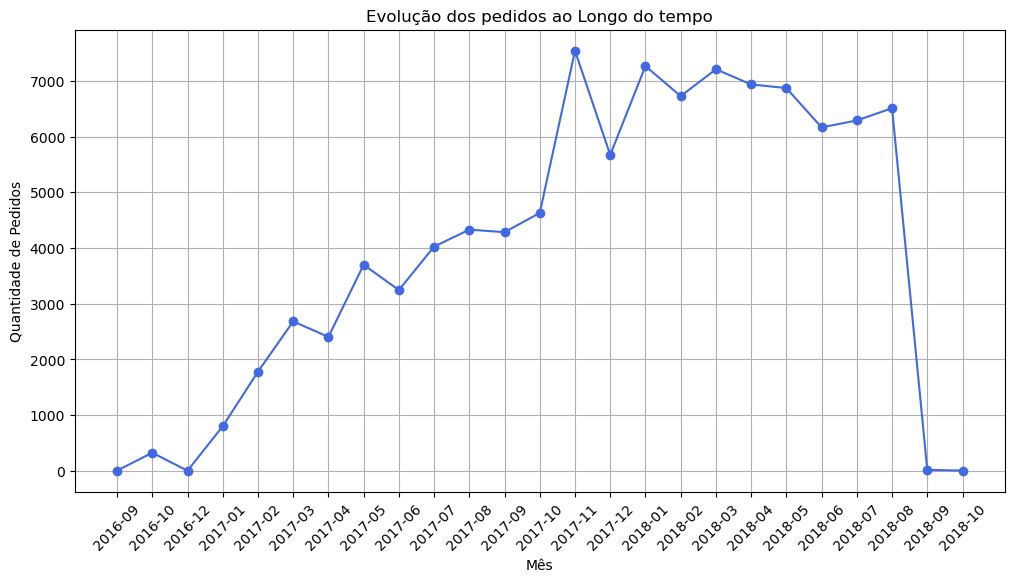

In [20]:
orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Evolução dos pedidos ao Longo do tempo")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Pedidos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
""" Os pedidos tiveram uma tendência de crescimento entre dezembro de 2016 até 
novembro de 2017, seguido de um perído de estabilização entre dezembro de 2017 até
agosto de 2018. Contudo, houve uma queda acentuada do número de pedidos de Agosto a 
Outubro, por isso é preciso checar se existem dados referente aos últimos meses
ou se os dados simplesmente acabaram."""

In [21]:
# Verificando se existem informações de pedidos nos últimos meses.
print(monthly_orders.tail(12))  # Últimos 12 meses disponíveis
""" Houveram pedidos nos últimos meses."""

order_purchase_month
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


' Houveram pedidos nos últimos meses.'

In [22]:
# Verificando os últimos 10 pedidos.
pd.set_option("display.max_columns", None)
print(orders.sort_values(by="order_purchase_timestamp", ascending=False).head(10))

                               order_id                       customer_id  \
60938  10a045cdf6a5650c21e9cfeb60384c16  a4b417188addbc05b26b72d5e44837a1   
68373  b059ee4de278302d550a3035c4cdb740  856336203359aa6a61bf3826f7d84c49   
31891  a2ac6dad85cf8af5b0afb510a240fe8c  4c2ec60c29d10c34bd49cb88aa85cfc4   
88500  616fa7d4871b87832197b2a137a115d2  bf6181a85bbb4115736c0a8db1a53be3   
50387  392ed9afd714e3c74767d0c4d3e3f477  2823ffda607a2316375088e0d00005ec   
37003  869997fbe01f39d184956b5c6bccfdbe  55c9dad94ec1a2ba57998bdb376c230a   
33979  5aac76cf7b07dd06fa4d50bf461d2f40  7a8a02e54cf3472df427e927f8b9c046   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
16366  bd35b677fd239386e9861d11ae98ab56  ad2eb5d02c0808bcd8743117f6383cf6   
5149   ea844c92cf978ea23321fa7fe5871761  6ddc45ad08e6a2c885ca2255fc52d6df   

      order_status order_purchase_timestamp order_approved_at  \
60938     canceled      2018-10-17 17:30:18               NaT   
68373     canceled    

In [ ]:
""" Todos os últimos 10 pedidos foram cancelados, indicando que houve algum grave problema
nos últimos meses, ainda não é possível identificar a razão e o motivo dos
cancelamentos e da queda tão acentuada no número de pedidos. """

Analisando o tempo de entrega dos pedidos.

In [23]:
# Criando coluna de tempo de entrega em dias.
orders["delivery_time"] = (
    orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

In [24]:
# Análise do tempo de entrega.
print(orders["delivery_time"].describe())

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64


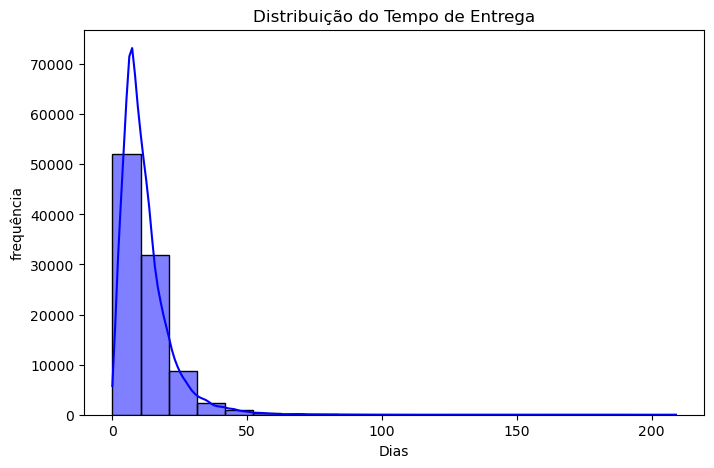

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(orders["delivery_time"].dropna(), bins=20, kde=True, color="blue")
plt.title("Distribuição do Tempo de Entrega")
plt.xlabel("Dias")
plt.ylabel("frequência")
plt.show()

In [ ]:
""" O gráfico indica que o tempo de entrega se concentra entre 10 e 20 dias, é importante
analisar se o tempo médio de entrega aumentou nos últimos meses, podendo ser uma
possível razão para a queda acentuada de pedidos nos últimos meses. """

Analisando o tempo médio de entrega ao longo dos meses.

In [ ]:
# Criando uma nova coluna com o mês de compra
orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period(
    "M")

In [ ]:
# Calculando o tempo médio de entrega por mês
monthly_delivery_time = orders.groupby("order_purchase_month")[
    "delivery_time"].mean()

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(12, 5))
plt.plot(monthly_delivery_time.index.astype(
    str), monthly_delivery_time.values, marker='o', linestyle="-", color="purple")
plt.xticks(rotation=45)
plt.title("Tempo Médio de Entrega ao Longo dos Meses")
plt.xlabel("Mês")
plt.ylabel("Tempo Médio de Entrega (dias)")
plt.grid(True)
plt.show()

In [ ]:
""" O tempo médio de entregas era alto no início, mas abaixou consideravelmente a partir
do 3 mês. O tempo médio teve baixa oscilação ao longo dos meses posteriores, com uma ligeira
queda nos últimos 3 meses. Portanto, não se pode atribuir a queda no número de pedidos ao
tempo de entrega dos produtos. """

In [ ]:
# Verificando a proporção de cancelamentos ao longo dos meses.
orders.groupby("order_purchase_month")["order_status"].value_counts(
    normalize=True).unstack()["canceled"].plot(kind="line", figsize=(12, 5))
plt.title("Proporção de Pedidos Cancelados por Mês")
plt.xlabel("Mês")
plt.ylabel("Cancelamentos (%)")
plt.show()

In [ ]:
""" O gráfico indicou que a proporção de pedidos cancelados aumentaram cerca de 90% 
nos últimos meses. É necessário, portanto, aprofundar com consultas em SQL para 
insights mais detalhados."""

Enviando os arquivos pro SQL server.

In [ ]:
orders["order_purchase_month"] = orders["order_purchase_month"].astype(str)

In [ ]:
# Configuração da conexão
server = "SEU_SERVIDOR"  # Exemplo: "localhost\SQLEXPRESS" ou "192.168.1.100"
database = "SEU_BANCO"    # Exemplo: "OlistDB"
username = "SEU_USUARIO"   # Se usar autenticação do Windows, pode não precisar
password = "SUA_SENHA"       # Se houver senha, coloque aqui

In [ ]:
# Criar a conexão usando SQLAlchemy
engine = create_engine(
    f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server")

In [ ]:
# Lista de tabelas tratadas para enviar ao SQL
datasets = {
    "orders": orders,
    "order_items": order_items,
    "customers": customers,
    "products": products,
    "sellers": sellers,
    "payments": payments,
    "geolocation": geolocation
}

In [ ]:
executar_envio = False
# Alterar "executar_envio para "True" se desejar enviar as tabelas para o SQL server.

In [ ]:
if executar_envio:
    # Enviar os DataFrames para o SQL Server
    for nome, df in datasets.items():
        if not df.empty:  # Verifica se o DataFrame não está vazio
            df.to_sql(nome, con=engine, if_exists="append", index=False)
            print(f"✅ {nome} carregado com sucesso no SQL Server!")
        else:
            print(f"⚠ Atenção: {nome} está vazio e não será carregado!")